In [ ]:
import pandas as pd

df = pd.read_csv('/content/Jamboree.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Lets see the distribution of the variables of graduate applicants.**

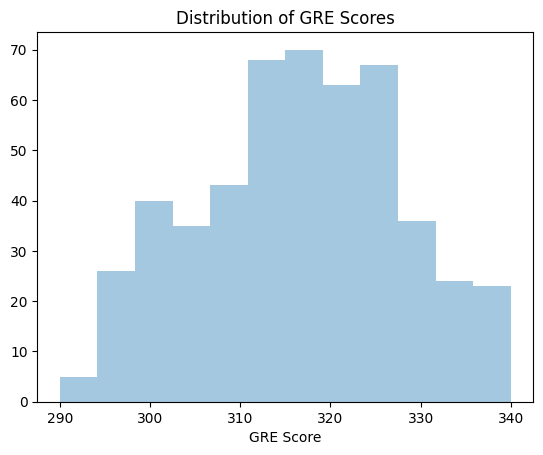

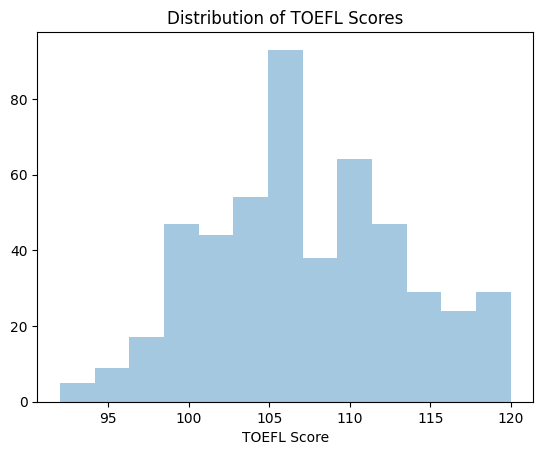

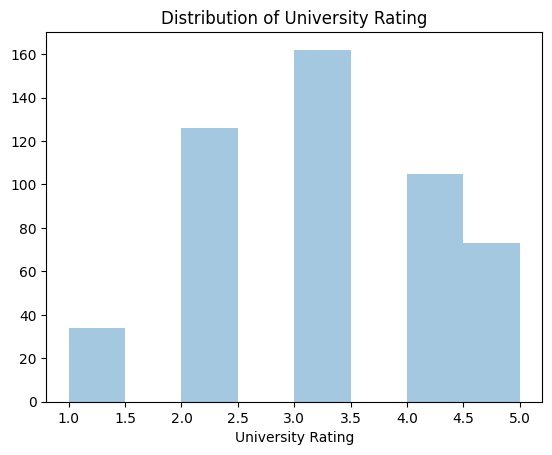

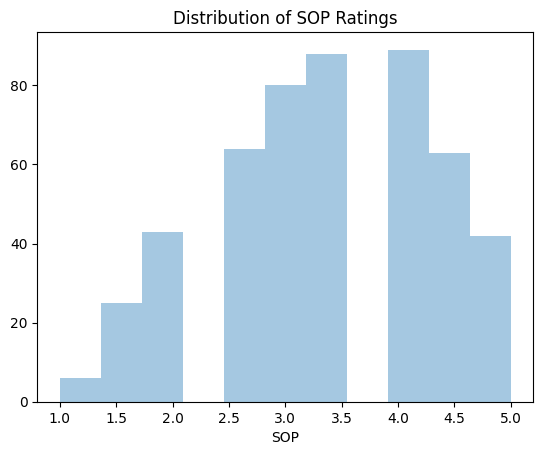

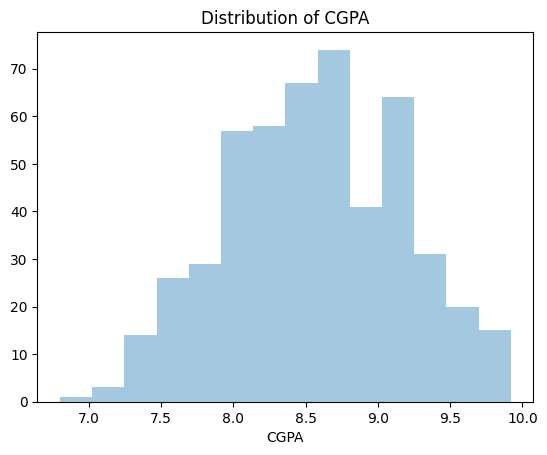

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

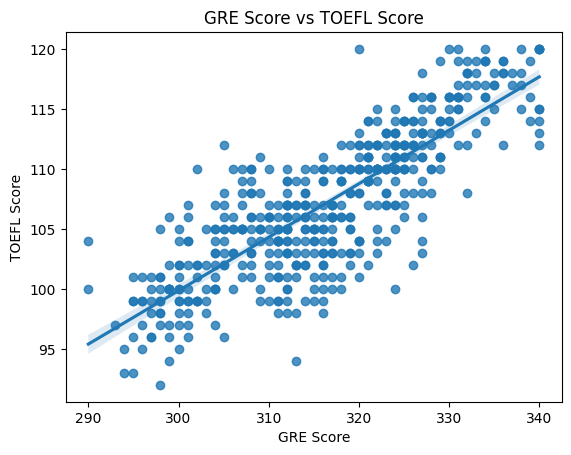

In [ ]:
fig = sns.regplot(x=df["GRE Score"], y=df["TOEFL Score"])
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

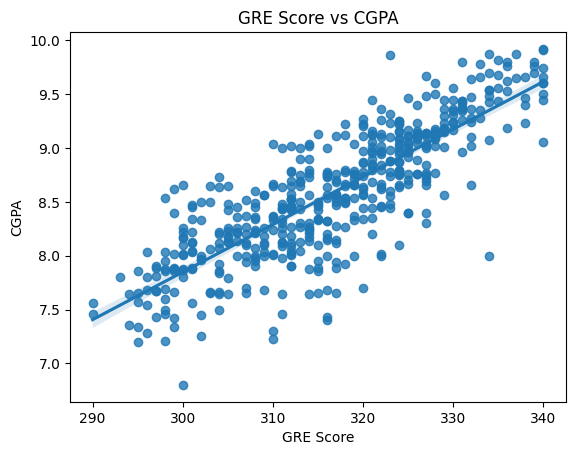

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

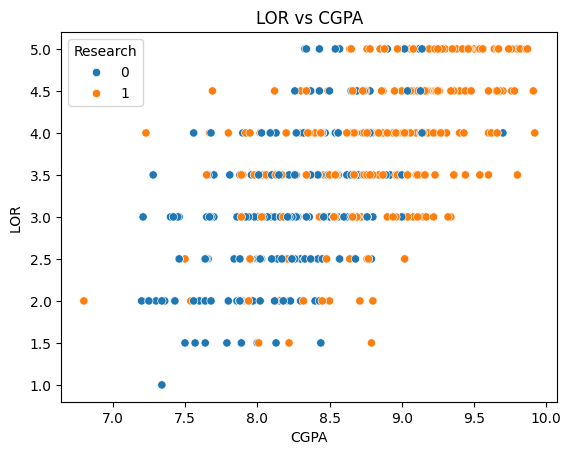

In [ ]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

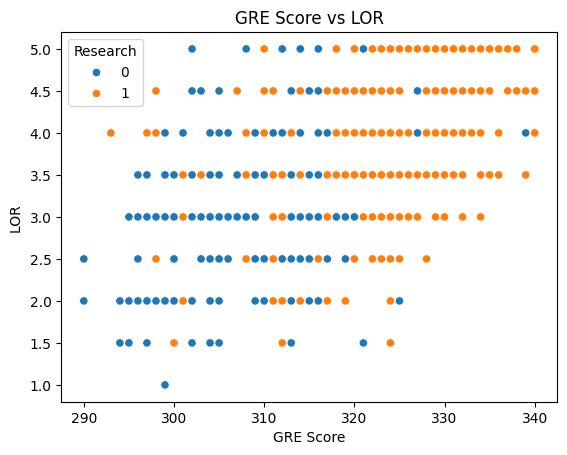

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

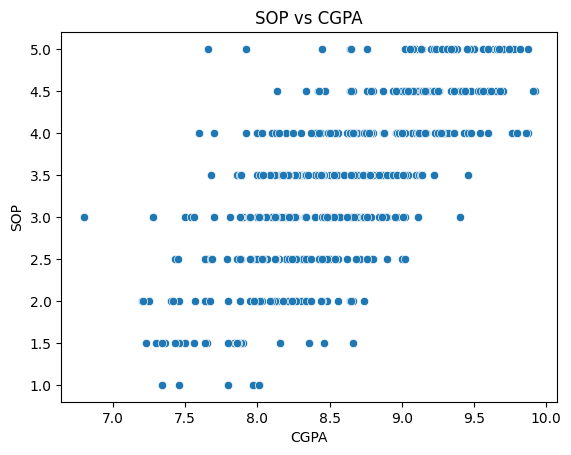

In [ ]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("SOP vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

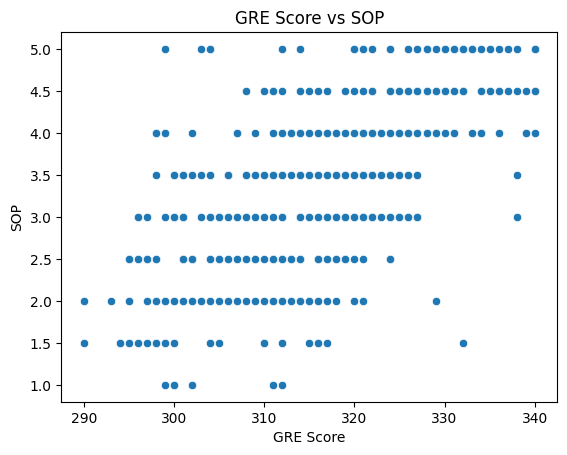

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

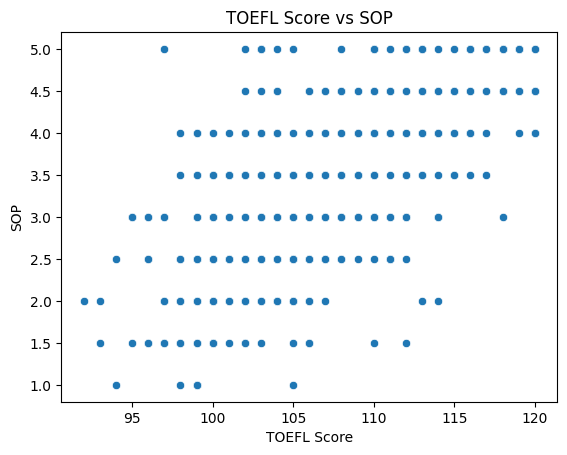

In [ ]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

**Correlation among variables**

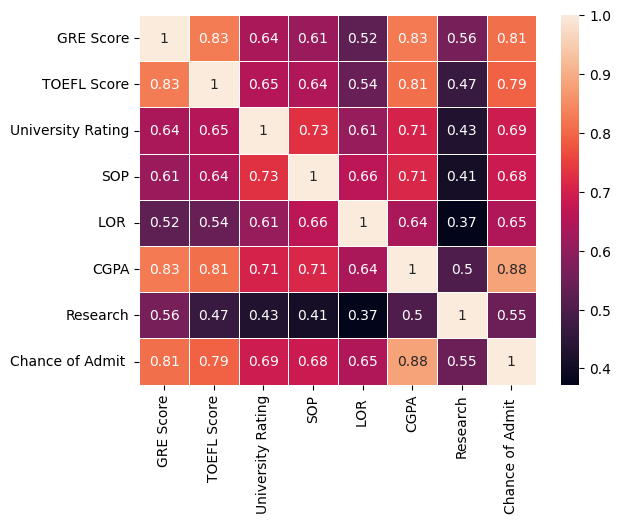

In [ ]:
import numpy as np
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)


In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
166,302,102,3,3.5,5.0,8.33,0
339,324,107,5,3.5,4.0,8.66,1
60,309,100,2,3.0,3.0,8.10,0
266,312,105,2,2.0,2.5,8.45,0
29,310,99,2,1.5,2.0,7.30,0
...,...,...,...,...,...,...,...
386,302,101,2,2.5,3.5,7.96,0
279,304,102,2,3.0,4.0,8.73,0
84,340,115,5,4.5,4.5,9.45,1
484,317,106,3,3.5,3.0,7.89,1


In [ ]:
y_train.head()

,Chance of Admit
166,0.65
339,0.81
60,0.48
266,0.72
29,0.54


In [ ]:
#Standardization

from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [ ]:
X_train_std

array([[-1.27331704, -0.83691259, -0.11008303, ...,  1.63406599,
        -0.41174505, -1.19341628],
       [ 0.65362878, -0.02751937,  1.65124551, ...,  0.54740531,
         0.12669706,  0.83793058],
       [-0.66019792, -1.16066988, -0.99074731, ..., -0.53925536,
        -0.78702289, -1.19341628],
       ...,
       [ 2.05504393,  1.26750978,  1.65124551, ...,  1.09073565,
         1.41569485,  0.83793058],
       [ 0.04050966, -0.18939801, -0.11008303, ..., -0.53925536,
        -1.12966787,  0.83793058],
       [ 0.21568655, -0.35127666,  0.77058124, ...,  1.09073565,
         0.12669706,  0.83793058]])

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.273317,-0.836913,-0.110083,0.118808,1.634066,-0.411745,-1.193416
1,0.653629,-0.027519,1.651246,0.118808,0.547405,0.126697,0.837931
2,-0.660198,-1.160670,-0.990747,-0.381436,-0.539255,-0.787023,-1.193416
3,-0.397433,-0.351277,-0.990747,-1.381925,-1.082586,-0.215948,-1.193416
4,-0.572609,-1.322549,-0.990747,-1.882169,-1.625916,-2.092337,-1.193416
...,...,...,...,...,...,...,...
395,-1.273317,-0.998791,-0.990747,-0.881681,0.004075,-1.015453,-1.193416
396,-1.098140,-0.836913,-0.990747,-0.381436,0.547405,0.240912,-1.193416
397,2.055044,1.267510,1.651246,1.119297,1.090736,1.415695,0.837931
398,0.040510,-0.189398,-0.110083,0.118808,-0.539255,-1.129668,0.837931


Lets use a bunch of different algorithms to see which model performs better

In [ ]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)],
          ['Ridge Regression :', Ridge(alpha=1.0)]
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.05893077122891897
Lasso Regression : 0.10920778834768904
Ridge Regression : 0.05882522982392922


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     266.2
Date:                Thu, 01 Aug 2024   Prob (F-statistic):          1.18e-144
Time:                        08:02:41   Log-Likelihood:                 558.72
No. Observations:                 400   AIC:                            -1101.
Df Residuals:                     392   BIC:                            -1069.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7222      0.00

In [ ]:
X_train_new=X_train.drop(columns='SOP')

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     311.0
Date:                Thu, 01 Aug 2024   Prob (F-statistic):          7.72e-146
Time:                        08:03:59   Log-Likelihood:                 558.52
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     393   BIC:                            -1075.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7222      0.00

## VIF(Variance Inflation Factor)

- “ VIF score of an independent variable represents how well the variable is explained by other independent variables.

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif


In [ ]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.645160
2,TOEFL Score,3.859334
3,University Rating,2.200380
4,LOR,1.770348
5,CGPA,4.981487
6,Research,1.472355


### VIF looks fine and hence, we can go ahead with the predictions

In [ ]:
X_test_std= std.transform(X_test)

In [ ]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train datasets


In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [ ]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [ ]:
X_test_new=X_test.drop(columns=X_test_del)

In [ ]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.04167157540570325
Root Mean Square Error  0.05882774625565979


**From the Low Mean Absolute Error & Root Mean Square Error, we can say our model is doing good**

## Mean of Residuals

In [ ]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.006537776739738324


## Test for Homoscedasticity

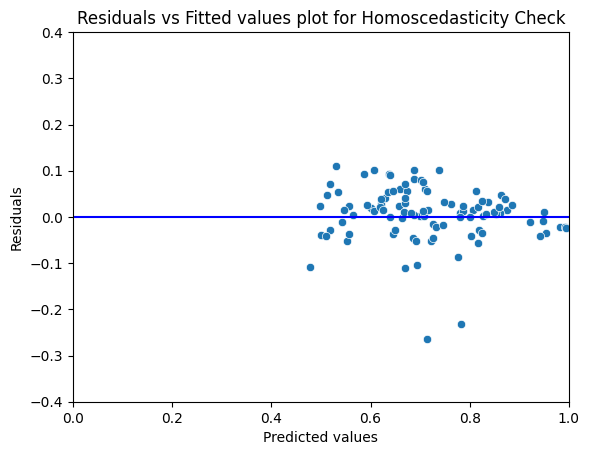

In [ ]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs Fitted values plot for Homoscedasticity Check')